## Hydrograph Development Notebook

In [3]:
import os
from glob import glob
import numpy as np
import pandas as pd
from scipy.integrate import trapz, cumtrapz, simps

from importlib import reload
import utils; reload(utils)
from utils import *
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Selection of Initial Hydrograph 
- For unsteady flow analysis, the shape of the hydrograph and resulting volume of flow is of primary importance for modeling flood inundation extent. In order to develop a hydrograph with the appropriate shape, we will use the plots from FirstLook as a starting point.
- The Hydrograph will then be stretched to the 100 yr Peak flow value, derived from the USGS PeakFQ software, using Bulletin 17-B methodology to analyze the peaks of record.

### Gage Data
- The gage (01509520, Lisle, NY) located nearest our area of interest was installed in June of 2017, provideing limited data. Therefore we will need to look upstream to find another gage, and evaluate the Drainage Area and make some assumptions in order to approximate the downstream flows.


- The neares gage (01509520, Cortland, NY) with sufficent data is located upstream, with a difference in drainage area of ~161 sqaure miles.

In [5]:
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *
df = initialize()

01509000_00060_dv.tsv
01509000_00060_iv.tsv
01509000_00065_iv.tsv
01509520_00065_iv.tsv
01511500_00065_iv.tsv




# Analyis:
### Assess appropriateness of using upstream gage to develop downstream hydrograph
From FirstLook, we know that the the peak of record for the upstream gage, Cortland occurred on 2005-04-03. For this gage we have daily and instaneous values.


**Interpolated daily flows result in a lower peak flow, but a greater total volume of water:**

Daily	 2.26 inches
Instant	 2.19 inches


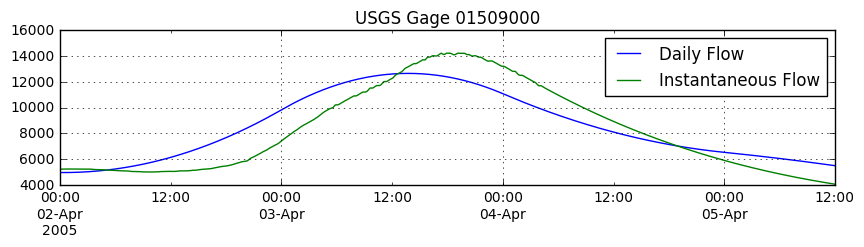

In [6]:
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

daily_peak, inst_peak = Daily_vs_Instant(df)
dvolume = IntegrateHydrograph(daily_peak, 490.)
print('Daily\t', dvolume, 'inches')
ivolume = IntegrateHydrograph(inst_peak, 490.)
print('Instant\t',ivolume, 'inches')

### Stretch hydrograph of mean daily averages to the peak flow from the instanteous records
Assess achange in shape & volume of hydrograph


**Results from Stretched Daily flows compared with Instantaneous Records**

Maximum Daily Flow (stretched) = 14233.0 cfs
Maximum Inst Flow = 14211.0 cfs
Daily	 2.38 inches
Instant	 2.19 inches


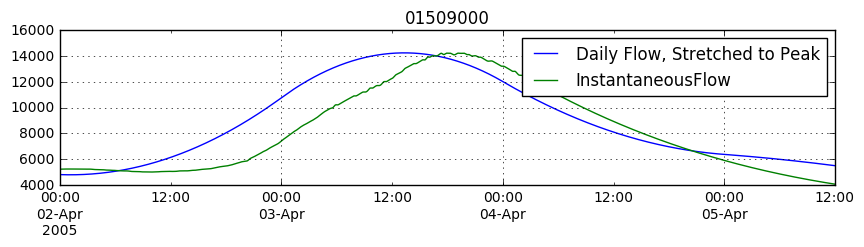

In [9]:
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *
daily_peak, inst_peak  = Stretched_Daily_vs_Instant(df)
dvolume = IntegrateHydrograph(daily_peak, 490.)
print('Daily\t', dvolume, 'inches')
ivolume = IntegrateHydrograph(inst_peak, 490.)
print('Instant\t',ivolume, 'inches')

# Stretch the Hydrograph to the 100 yr flow
* 100 yr flow obtained for this gage using USGS PeakFQ Bulletin 17-B analysis

In [8]:
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

pct_1_peak, inst_peak  = Stretched_Daily_100yr(df)
dvolume = IntegrateHydrograph(pct_1_peak, 490.)
print('\n1 Percent\t', dvolume, 'inches')
ivolume = IntegrateHydrograph(inst_peak, 490.)
print('April Event\t',ivolume, 'inches')




1 Percent	 2.89 inches
April Event	 2.21 inches
